## **Installing Packages**

In [2]:
!pip install textblob
!pip install sentencepiece  
!pip install transformers
!pip install textstat
!pip install language-tool-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 7.0 MB/s 
     |████████████████████████████████| 7.6 MB 48.1 MB/s 
     |████████████████████████████████| 163 kB 46.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 7.0 MB/s 
     |████████████████████████████████| 2.0 MB 46.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart Runtime after installing 

## **Importing Packages**

In [3]:
import re
import nltk 
import spacy
import textstat
import numpy as np
import pandas as pd
import seaborn as sn 
from textblob import Word
import matplotlib.pyplot as plt
import language_tool_python

from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
tool = language_tool_python.LanguageTool('en-US')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
INFO:language_tool_python.download_lt:Unzipping /tmp/tmptjddw5d3.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


# **Reading Data From Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')
Data_Essay_01 = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01.csv")
Data_Essay_01.head()

Mounted at /content/drive


,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score
0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


# **Feature Extraction**

## **Essay Pre Processing**

In [6]:
def Remove_NER(Essay):
  """
    Removes Named Entity Recognition (NER) from each essay

    Args:
      Sentence: Essay of each student 
    
    Returns: 
      String

  """
  token = Essay.split()
  newTokens = []
  # print(token)
  for i in range(len(token)):
    if "@" in token[i]:
      if "," in token[i]:
        newTokens.append(",")
      elif "." in token[i]:
        newTokens.append(".")
      elif "!" in token[i]:
        newTokens.append("!")
    else:
      newTokens.append(token[i])

  return " ".join(newTokens)
  # return ' '.join (word for word in Essay.split(' ') if not word.startswith('@'))

def Remove_Punctuations(sentence):
  """
    Removes punctuations from text
    Args:
      sentence: Essay of each student
    
    Returns: 
      String
  """
  punctuations = '''!()-[]{};:"\,/'<>.?@#$%^&*_~'''
  newSentence = ""
  for word in sentence:
      if (word in punctuations):
          newSentence = newSentence + " "
      else: 
          newSentence = newSentence + word
  return newSentence

def LowerCase_Words(Essay):
  """
    Lower case all the words in an essay

    Args:
      Sentence: Essay of each student
    
    Returns: 
      String
  """
  return re.sub('[0-9]+','', Essay).lower() 

def Tokenize_Essay(Essay):
    """
      Create Tokens of each Essay

      Args:
        Essay: Essay of each student
      
      Returns: 
        String
    """
    Preprocessed = Remove_Punctuations(Essay)
    return " ".join(word_tokenize(Preprocessed))

def Remove_White_Spaces(Essay):
  """
    Removes Extra White Spaces

    Args:
      Essay: Essay of each student
    
    Returns: 
      String
  """
  return " ".join(Essay.split())

def Remove_Special_Characters(Essay):
  """
    Removes Special Characters from Essay

    Args:
      Essay: Essay of each student
    
    Returns: 
      String
  """
  new_text = re.sub(r"[^a-zA-Z0-9 ]", "", Essay)
  return new_text

## **Basic Count Features**

This section will cover:


*   Counting Sentences per Essay
*   Counting Words per Essay
*   Counting Characters per Essay
*   Average Words per Essay
*   Counting Syllables


#### Counting Sentences per Essay

In [7]:
def Sentence_Count(Essay):
    """
    Counts sentences in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int
  """
    sentence_no = nltk.sent_tokenize(Essay)
    return len(sentence_no)

In [8]:
Data_Essay_01['Sent_Count'] = Data_Essay_01['Essay'].apply(Sentence_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count
123,124,I think that the computers are good to be used...,4.0,3.0,7.0,9


#### Counting Words per Essay

**Observation:** These word count are more than the original count coz of nltk tokenization. Punctations are treated as seperate words.


In [9]:
def Word_Count(Essay):
  """
    Counts words in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int  
  """ 
  word_no = nltk.word_tokenize(Essay)
  return len(word_no)

In [10]:
Data_Essay_01['Word_Count'] = Data_Essay_01['Essay'].apply(Word_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count
904,907,"Dear newspaper and readers of @LOCATION1, I am...",5.0,4.0,9.0,19,409


#### Counting Characters per Essay

In [ ]:
def Char_Count(Essay):
  """
    Counts characters in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int
  """
  return len([character for character in Essay])

In [ ]:
Data_Essay_01['Char_Count'] = Data_Essay_01['Essay'].apply(Char_Count)
Data_Essay_01.sample()

#### Average Word Length of Essay

In [12]:
def Avg_Word_Count(Essay):
  """
    Calculates Average Word Count In An Essay Set

    Args:
      Essay: Essay of each student 
    
    Returns: 
      float
      
  """
  word_list = nltk.word_tokenize(Essay)
  total = sum(map(len, word_list))/len(word_list)
  return total

In [13]:
Data_Essay_01['Avg_Word_Count'] = Data_Essay_01['Essay'].apply(Avg_Word_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Avg_Word_Count
718,721,"Dear local newspaper, it has came to @CAPS2 at...",5.0,4.0,9.0,21,433,4.205543


#### Counting Syllables

In [ ]:
def Syllable_Count(text):
  return textstat.syllable_count(text, lang='en_US')

In [ ]:
Data_Essay_01["Preprocessed_Essay"].apply(LowerCase_Words)
Data_Essay_01["Syllable_Count"]=Data_Essay_01["Preprocessed_Essay"].apply(Syllable_Count)
Data_Essay_01["Syllable_Count"]

KeyError: ignored

## **Parts Of Speech Counts**

This section will cover:


*   Counting Nouns per Essay
*   Counting Adjectives per Essay
*   Counting Proper Nouns per Essay
*   Counting Adverbs per Essay
*   Counting Conjunctions per Essay

Removing NERs, Punctuations and Lower Casing

In [ ]:
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Essay'].apply(Remove_NER)
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Preprocessed_Essay'].apply(Tokenize_Essay)
Data_Essay_01.head()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Preprocessed_Essay
0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,16,386,1875,3.984456,Dear local newspaper I think effects computers...
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,20,464,2288,4.030172,Dear I believe that using computers will benef...
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,14,313,1541,4.035144,Dear More and more people use computers but no...
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,27,611,3165,4.328969,Dear Local Newspaper I have found that many ex...
4,5,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,30,517,2569,4.071567,Dear I know having computers has a positive ef...


In [ ]:
def Pos_Tag_Count(Essay):
  """
    Counts Parts of Speech in an Essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int,int,int,int,int,int    
  """
  tagged_doc = nlp(Essay)

  adj_count=0
  verb_count=0
  noun_count=0
  pNoun_count=0
  adverb_count=0
  conj_count=0

  for token in tagged_doc:

    if(token.pos_ == 'ADJ'):
      adj_count+=1
    
    elif(token.pos_ =='NOUN'):
      noun_count+=1

    elif (token.pos_ =='PRON'):
      pNoun_count+=1

    elif (token.pos_ =='VERB'):
      verb_count+=1

    elif (token.pos_ =='ADV'):
      adverb_count+=1
    
    elif(token.pos_=='CCONJ'):
      conj_count+=1

  return verb_count,noun_count, adj_count, conj_count, adverb_count,pNoun_count

In [ ]:
Data_Essay_01['Verb_Count'], Data_Essay_01['Noun_Count'], Data_Essay_01['Adj_Count'], Data_Essay_01['Conj_Count'], Data_Essay_01['Adverb_Count'], Data_Essay_01['pNoun_Count']=zip(*Data_Essay_01["Preprocessed_Essay"].map(Pos_Tag_Count))
Data_Essay_01.sample()

# **Evaluating Writing Attributes**

This section will cover:


*   Style
*   Content
*   Semantic
*   Semantic Coherence & Consistency 
*   Connectivity
*   Readibility Scores


## **Style**

This section will cover:


*   Mechanics
*   Grammar
*   Lexical Sophistication



### **Mechanics**

This section will cover:


*   Counting Spelling Mistakes
*   Correcting Spelling Mistakes
*   Checking Punctuations
*   Counting Punctuations
*   Checking Capitalization



#### Counting Spelling Mistakes

In [ ]:
def Check_Spelling(Sentence):
  """
    Checks spelling of each word

    Args:
      word: Words (Tokens) of each essay 
    
    Returns: 
      int
  """
  count = 0
  Sentence = word_tokenize(Sentence)
  for word in Sentence:
    word = Word(word)
  
    result = word.spellcheck()

    # result [0][0] contains the bool value if the spelling is correct or not
    # result [0][1] contains the confidence for the suggest correct spelling

    if word != result[0][0]:
      if(result[0][1] > 0.9 and not(wordnet.synsets(word)) and not("/" in word) and not (word == "If" or word == "if")):
        count = count + 1

  return count

In [ ]:
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Essay"].apply(Remove_NER)

In [ ]:
Data_Essay_01["Spelling_Mistakes_Count"]  = Data_Essay_01["Preprocessed_Essay"].map(Check_Spelling)
Data_Essay_01.sample()

KeyboardInterrupt: ignored

#### Correcting Spelling Mistakes via LanguageTool

In [ ]:
def Spelling_Error_Correct(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'GRAMMAR'
    matches = [rule for rule in matches if not is_bad_rule(rule)]
    # print(matches[0].category)
    language_tool_python.utils.correct(essays, matches)   # to correct it
    return essays

In [ ]:
Data_Essay_01['Essay_SpellingCorrected_LT'] = Data_Essay_01['Essay_NoWhiteSpace'].apply(Spelling_Error_Correct)

#### Checking Punctuation Mistakes **(Incomplete)**

Checking Punctuation Mistakes

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification , pipeline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('oliverguhr/fullstop-punctuation-multilang-large')
model = AutoModelForTokenClassification.from_pretrained('oliverguhr/fullstop-punctuation-multilang-large')
pun = pipeline('ner' , model = model , tokenizer = tokenizer)

In [ ]:
tags = pun(text)

Updated_string = ''

for output in tags:
  result = output['word'].replace('▁' , ' ') + output['entity'].replace('0', '')
  Updated_string += result

Updated_string

In [ ]:
def Punctuation_Errors(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'PUNCTUATION'
    matches = [rule for rule in matches if is_bad_rule(rule)]
    return len(matches)

In [ ]:
Data_Essay_01["Without_White_Spaces"] = Data_Essay_01["Essay"].apply(Remove_White_Spaces)

In [ ]:
Data_Essay_01["Punctuation_Errors"] = Data_Essay_01["Without_White_Spaces"].apply(Punctuation_Errors)

#### Counting Number Of Punctuations

In [ ]:
def Count_Punctuations(Essay):
  """
    Counts Punctuations used in an Essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int,int,int,int,int
      
  """
  count_fullstops = 0
  count_exclamation = 0
  count_comma = 0
  count_hyphens = 0
  count_questionmark = 0

  tokens = word_tokenize(Essay)

  for word in tokens:
    if word == ".":
      count_fullstops += 1
    elif word == "!":
      count_exclamation += 1
    elif word == "?":
      count_questionmark += 1
    elif word == ",":
      count_comma += 1
    elif word == "-":
      count_hyphens += 1

  return count_fullstops , count_exclamation , count_comma , count_questionmark , count_hyphens

In [ ]:
Data_Essay_01["Count_Fullstops"] , Data_Essay_01["Count_Exclamation"] , Data_Essay_01["Count_Comma"] , Data_Essay_01["Count_Questionmark"] , Data_Essay_01["Count_Hyphens"] = zip(*Data_Essay_01["Essay"].map(Count_Punctuations))
Data_Essay_01.sample()

#### Checking Capitalization Mistakes

In [ ]:
def Check_Capitalization(Essay):
  """
    Checks capitalization in each sentence of an essay

    Args:
    Essay: Words (Tokens) of each essay 

    Returns: 
    int

  """
  count = 0

  words = Essay.split()
  alreadyCounted_Words = []
  
  for i in range(len(words) - 1):
    if (i == 0):                                                    # Checking Capital Letter at the start of Sentence
      if words[i] != words[i].title():
        alreadyCounted_Words.append(words[i])
        count = count + 1
    elif "@" in words[i]:
      continue
    elif words[i] == '.' or words[i] == '"':                         # Checking Capital Letters in start of every sentence & start of every quote
      match = words[i+1]
      if match != words[i+1].title():
        alreadyCounted_Words.append(words[i])
        count = count + 1
        i = i + 1
    
    # Check if capital in middle 
    
  # Checking if all proper nouns are capital or not

  tagged_sent = nlp(Essay)

  for i in range(len(tagged_sent)):
    if tagged_sent[i].pos_ == "PROPN":
      # print(tagged_sent[i]) 
      word = tagged_sent[i].text 
      if word in alreadyCounted_Words:
        alreadyCounted_Words.remove(word)
      elif word != word.title():
        count = count + 1

  return count

In [ ]:
Data_Essay_01["Preprocessed_Essay"] =  Data_Essay_01["Essay"].apply(Remove_NER)
Data_Essay_01["Capitalization_Errors"] = Data_Essay_01["Preprocessed_Essay"].apply(Check_Capitalization)
Data_Essay_01.sample()

In [ ]:
Data_Essay_01.to_csv("EssaySet01_Features_Updated.csv")     

### **Grammar Error Detection**

In [ ]:
# from nltk.translate.bleu_score import sentence_bleu
# reference = result.text.split()

# candidate = 'Dear local newspaper, @CAPS1 best friend, @LOCATION2, was once a nerd with no hand-eye coordination, @CAPS2, he started to use a computer and now he has better hand-eye coordination than me.'.split()
# print('BLEU score -> {}'.format(sentence_bleu(reference, candidate )))

In [ ]:
df1 = Data_Essay_01[['Essay_SpellingCorrected_LT', 'Sent_Count']]
# df1['Essay_Spelling_Corrected_LT'] = df1['Essay_SpellingCorrected_LT'].apply(Remove_White_Spaces)   # to avoid whitespace error
df1.head()

In [ ]:
def Grammar_Errors(essays):
    
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'GRAMMAR'
    matches = [rule for rule in matches if is_bad_rule(rule)]
    # print(matches[0].category)
    errors = []
    #language_tool_python.utils.correct(text, matches)   # to correct it
    for i in range(0, len(matches)):
      errors.append(matches[i].ruleId)  # or category of the error (Misc, Whitespace, Typography)
    return len(matches), errors

In [ ]:
Grammar_Errors("Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening.")

In [ ]:
# Data_Essay_01['Grammar_Errors'], Data_Essay_01['Grammar_Error_List'] = zip(*df1_copy['Essay'].map(grammar_errors))
Data_Essay_01['Grammar_Error_Count'], Data_Essay_01['Grammar_Error_List'] = zip(*df1['Essay_SpellingCorrected_LT'].map(Grammar_Errors))

In [ ]:
Data_Essay_01.columns

In [ ]:
out = Data_Essay_01['Grammar_Error_List'].explode().value_counts()
out

In [ ]:
out.to_csv('GrammarErrors.csv')

In [ ]:
features = Data_Essay_01[['Sent_Count', 'Word_Count', 'Char_Count', 'Avg_Word_Count','Verb_Count', 'Noun_Count', 'Adj_Count',
       'Conj_Count', 'Adverb_Count', 'pNoun_Count', 'Grammar_Error_Count', 'Grammar_Error_List']]
features.to_csv("EssaySet01_Features.csv")     

### **Lexical Sophistication**

In [ ]:
pip install taaled
#RESOURCES FOR LEXICAL SOPHISTICATION 
#https://eli-data-mining-group.github.io/Pitt-ELI-Corpus/publications/Naismith_2019.pdf
#https://pypi.org/project/taaled/
#https://github.com/LCR-ADS-Lab/pylats

## **Content**

This section will cover:


*   Latent Semantic Analysis (LSA)


### **Latent Semantic Analysis (LSA)**

Content analysis generally implies only a high-level semantic analysis and comparison with source text and graded essays

## **Semantic**
Semantic metrics assess the correctness of content connotation

## **Semantic Coherence & Consistency**

## **Connectivity**

In [14]:
# Step01: Making a temp dataframe for sepearte preprocessing of connectors
df_connectors = Data_Essay_01[['Essay', 'Sent_Count']]
df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Essay'].apply(LowerCase_Words)  # for ease in matching
df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(Remove_NER) # no impact on connectors count, removing it to save computational time.
df_connectors['Preprocessed_Essay_For_Connectors'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(Remove_White_Spaces) # for ease in ngrams
df_connectors.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Essay,Sent_Count,Preprocessed_Essay_For_Connectors
0,"Dear local newspaper, I think effects computer...",16,"dear local newspaper, i think effects computer..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",20,"dear , i believe that using computers will ben..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,"dear, more and more people use computers, but ..."
3,"Dear Local Newspaper, @CAPS1 I have found that...",27,"dear local newspaper, i have found that many e..."
4,"Dear @LOCATION1, I know having computers has a...",30,"dear , i know having computers has a positive ..."


In [15]:
#Step02: Generating n_grams of each essay. 
def generate_N_grams(essay,ngram=1):
  words=[word for word in essay.split(" ")]  
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ngram_list=[' '.join(ngram) for ngram in temp]
  return ngram_list

In [16]:
df_connectors['Unigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =1)
df_connectors['Bigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =2)
df_connectors['Trigrams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =3)
df_connectors['Four-grams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =4)
df_connectors['Five-grams'] = df_connectors['Preprocessed_Essay_For_Connectors'].apply(generate_N_grams, ngram =5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [17]:
df_connectors['Four-grams'][17]

['dear local newspaper, i',
 'local newspaper, i must',
 'newspaper, i must admit',
 'i must admit that',
 'must admit that the',
 'admit that the experts',
 'that the experts are',
 'the experts are centainly',
 'experts are centainly right',
 'are centainly right cause',
 'centainly right cause i',
 'right cause i know',
 'cause i know people',
 'i know people that',
 'know people that stay',
 'people that stay on',
 'that stay on the',
 'stay on the computer',
 'on the computer all',
 'the computer all day',
 'computer all day and',
 'all day and that’s',
 'day and that’s really',
 'and that’s really not',
 'that’s really not good',
 'really not good if',
 'not good if you',
 'good if you ask',
 'if you ask me.',
 'you ask me. instead',
 'ask me. instead of',
 'me. instead of being',
 'instead of being on',
 'of being on computers',
 'being on computers learning',
 'on computers learning about',
 'computers learning about faraway',
 'learning about faraway places,',
 'about faraway 

In [56]:
# Step03: Loading the file of connectors.
filename = "/content/drive/MyDrive/IntelliTech-DataSet/Connectors_Words.txt"
with open(filename) as file:
    defined_connectors = [line.rstrip() for line in file]

defined_connectors = set(defined_connectors)  #remove duplicate connectors
print(len(defined_connectors))

312


In [25]:
# Step 04: Make a connector detection function

def connectors_detection(unigrams_list, bigram_list, trigram_list, four_grams_list, five_grams_list):
  connectors_detected = []
  for token in unigrams_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in bigram_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in trigram_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in four_grams_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  for token in five_grams_list:
    if token in defined_connectors:
      connectors_detected.append(token)
  
  #use SET connectors_detected for tf-idf work, unique connectors
  return set(connectors_detected)
  #return len(connectors_detected)

In [26]:
df_connectors['Connectors'] = df_connectors.apply(lambda row: connectors_detection(row['Unigrams'], row['Bigrams'],row['Trigrams'],row['Four-grams'],row['Five-grams']),axis = 1)

In [27]:
df_connectors.head()

,Essay,Sent_Count,Preprocessed_Essay_For_Connectors,Unigrams,Bigrams,Trigrams,Four-grams,Five-grams,Number_of_Connectors,Connectors
0,"Dear local newspaper, I think effects computer...",16,"dear local newspaper, i think effects computer...","[dear, local, newspaper,, i, think, effects, c...","[dear local, local newspaper,, newspaper, i, i...","[dear local newspaper,, local newspaper, i, ne...","[dear local newspaper, i, local newspaper, i t...","[dear local newspaper, i think, local newspape...",41,"{but, now, and, about, while, or, to, then, wh..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",20,"dear , i believe that using computers will ben...","[dear, ,, i, believe, that, using, computers, ...","[dear ,, , i, i believe, believe that, that us...","[dear , i, , i believe, i believe that, believ...","[dear , i believe, , i believe that, i believe...","[dear , i believe that, , i believe that using...",52,"{but, when, like, now, and, over, not only, fo..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,"dear, more and more people use computers, but ...","[dear,, more, and, more, people, use, computer...","[dear, more, more and, and more, more people, ...","[dear, more and, more and more, and more peopl...","[dear, more and more, more and more people, an...","[dear, more and more people, more and more peo...",35,"{but, instead, and, for, to, or, then, up, whe..."
3,"Dear Local Newspaper, @CAPS1 I have found that...",27,"dear local newspaper, i have found that many e...","[dear, local, newspaper,, i, have, found, that...","[dear local, local newspaper,, newspaper, i, i...","[dear local newspaper,, local newspaper, i, ne...","[dear local newspaper, i, local newspaper, i h...","[dear local newspaper, i have, local newspaper...",60,"{after, and, that is, suddenly, when, as, for,..."
4,"Dear @LOCATION1, I know having computers has a...",30,"dear , i know having computers has a positive ...","[dear, ,, i, know, having, computers, has, a, ...","[dear ,, , i, i know, know having, having comp...","[dear , i, , i know, i know having, know havin...","[dear , i know, , i know having, i know having...","[dear , i know having, , i know having compute...",58,"{between, and, so that, as a result, when, as,..."


The minimum value that the index may generate is 0. There is no specified maximum limit on the index. Zero (0) denotes no connector at all, while an index close to 2 shows that there are many effective connectors in (almost) every sentence. The connectivity index is calculated for each essay.

In [43]:
# Optimizing connectors via TF-IDF

def TF(essay,connectors):
  freq = 0
  for word in essay.split(" "):
    if word in connectors:
      freq = freq + 1
  return freq

def IDF(essay,connector):
  doc = 0;
  sent_list = nltk.tokenize.sent_tokenize(essay)
  for i in range(0, len(sent_list)):
    if connector in sent_list[i]:
      doc = doc + 1
  return 1+ np.log(len(sent_list) / (doc))

def TF_IDF(essay, connector):
  tf = TF(essay,connector)
  idf = IDF(essay,connector)
  tf_idf = tf * idf
  return tf_idf

def connectivity_index(essay, connectors,num_sent):
  weights = []
  for word in connectors:
    score = TF_IDF(essay,word)
    weights.append(score)
  return float(sum(weights) / num_sent)

Data_Essay_01['Connectivity_Index'] = df_connectors.apply(lambda row: connectivity_index(row['Preprocessed_Essay_For_Connectors'], row['Connectors'], row['Sent_Count']), axis=1)


In [44]:
df_connectors.head()

,Essay,Sent_Count,Preprocessed_Essay_For_Connectors,Unigrams,Bigrams,Trigrams,Four-grams,Five-grams,Number_of_Connectors,Connectors,Connectivity_Index
0,"Dear local newspaper, I think effects computer...",16,"dear local newspaper, i think effects computer...","[dear, local, newspaper,, i, think, effects, c...","[dear local, local newspaper,, newspaper, i, i...","[dear local newspaper,, local newspaper, i, ne...","[dear local newspaper, i, local newspaper, i t...","[dear local newspaper, i think, local newspape...",41,"{but, now, and, about, while, or, to, then, wh...",24.552787
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",20,"dear , i believe that using computers will ben...","[dear, ,, i, believe, that, using, computers, ...","[dear ,, , i, i believe, believe that, that us...","[dear , i, , i believe, i believe that, believ...","[dear , i believe, , i believe that, i believe...","[dear , i believe that, , i believe that using...",52,"{but, when, like, now, and, over, not only, fo...",25.344232
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,"dear, more and more people use computers, but ...","[dear,, more, and, more, people, use, computer...","[dear, more, more and, and more, more people, ...","[dear, more and, more and more, and more peopl...","[dear, more and more, more and more people, an...","[dear, more and more people, more and more peo...",35,"{but, instead, and, for, to, or, then, up, whe...",14.662850
3,"Dear Local Newspaper, @CAPS1 I have found that...",27,"dear local newspaper, i have found that many e...","[dear, local, newspaper,, i, have, found, that...","[dear local, local newspaper,, newspaper, i, i...","[dear local newspaper,, local newspaper, i, ne...","[dear local newspaper, i, local newspaper, i h...","[dear local newspaper, i have, local newspaper...",60,"{after, and, that is, suddenly, when, as, for,...",32.408323
4,"Dear @LOCATION1, I know having computers has a...",30,"dear , i know having computers has a positive ...","[dear, ,, i, know, having, computers, has, a, ...","[dear ,, , i, i know, know having, having comp...","[dear , i, , i know, i know having, know havin...","[dear , i know, , i know having, i know having...","[dear , i know having, , i know having compute...",58,"{between, and, so that, as a result, when, as,...",27.824804


In [41]:
df_connectors['Connectivity_Index'].describe()

count    1783.000000
mean       22.162848
std        10.921233
min         0.846574
25%        14.385855
50%        20.134345
75%        27.894780
max        95.304019
Name: Connectivity_Index, dtype: float64

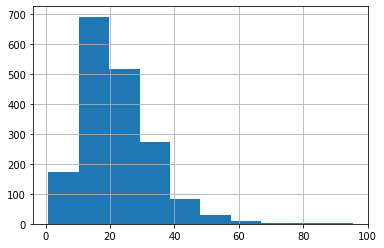

In [42]:
df_connectors['Connectivity_Index'].hist()

## **Readibility Scores**

We section will cover:
1.   Flesch Reading Ease
2.   Flesch-Kincaid Grade Level
3.   Gunning Fog Index
4.   Dale Chall Readability Formula
5.   Shannon Entropy
6.   Simpson's Index

In [ ]:
def Flesch_Reading_East_Score(scount,NoOfsentences,total_Words):
 return (206.835-1.015*(total_Words/float(NoOfsentences))-84.6*(scount / float(total_Words)))

In [ ]:
Data_Essay_01["Flesch_Reading_Score"] = [0] * 1783
for index, row in Data_Essay_01.iterrows():
  Data_Essay_01['Flesch_Reading_Score'][index] = Flesch_Reading_East_Score(row["Syllable_Count"],row["Sent_Count"],row["Word_Count"])

In [ ]:
Data_Essay_01["Flesch_Reading_Score"]

# **Features Correlation Visualization**

In [ ]:
Data_Essay_01_Features = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01_Features.csv")
Data_Essay_01_Features.head()

In [ ]:
Data_Essay_01_Features["Target_Score"] = Data_Essay_01["Total Score"]
Data_Essay_01_Features["Flesch_Reading_Score"] = Data_Essay_01["Flesch_Reading_Score"]
Data_Essay_01_Features.columns

In [ ]:
Data_Essay_01_Features.drop('Unnamed: 0' , axis = 1 , inplace = True)
Data_Essay_01_Features.drop("Unnamed: 20" , axis = 1, inplace = True)
Data_Essay_01_Features.drop("Unnamed: 18" , axis = 1, inplace = True)

In [ ]:
Data_Essay_01_Features.corr()

In [ ]:
import seaborn as sns

# Plot correlation of essay-length related features
cols = ['Sent_Count', 'Word_Count', 'Char_Count']
#        'Avg_Word_Count',
#        'Verb_Count', 'Noun_Count', 'Adj_Count', 'Conj_Count', 'Adverb_Count',
#        'pNoun_Count', 'Count_Fullstops', 'Count_Exclamation', 'Count_Comma',
#        'Count_Questionmark', 'Count_Hyphens', 'Capitalization_Errors',
#        'Grammar_Error_Count', 'Punctuation_Errors']
        
g = sns.pairplot(Data_Essay_01_Features, hue='Target_Score', vars=cols, plot_kws={"s": 20}, palette="bright")
g.fig.subplots_adjust(top=.93)
g.fig.suptitle('Pairplots of select features', fontsize=16)
plt.show()